In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats
from scipy.stats import kurtosis, skew

# Задаем параметры
k = 7  # Число степеней свободы
n = 110  # Размер выборки

(array([0.0306354 , 0.        , 0.        , 0.0306354 , 0.0306354 ,
        0.0612708 , 0.0919062 , 0.0306354 , 0.0612708 , 0.24508321,
        0.30635401, 0.30635401, 0.30635401, 0.30635401, 0.36762481,
        0.33698941, 0.153177  , 0.153177  , 0.1225416 , 0.0919062 ,
        0.0919062 , 0.0919062 , 0.0306354 , 0.0612708 , 0.        ,
        0.        , 0.0306354 , 0.        , 0.        , 0.0306354 ]),
 array([-4.2060498 , -3.90930457, -3.61255934, -3.31581411, -3.01906888,
        -2.72232365, -2.42557842, -2.12883319, -1.83208796, -1.53534273,
        -1.2385975 , -0.94185227, -0.64510704, -0.34836181, -0.05161658,
         0.24512865,  0.54187388,  0.83861911,  1.13536434,  1.43210957,
         1.7288548 ,  2.02560003,  2.32234526,  2.61909049,  2.91583572,
         3.21258094,  3.50932617,  3.8060714 ,  4.10281663,  4.39956186,
         4.69630709]),
 <BarContainer object of 30 artists>)

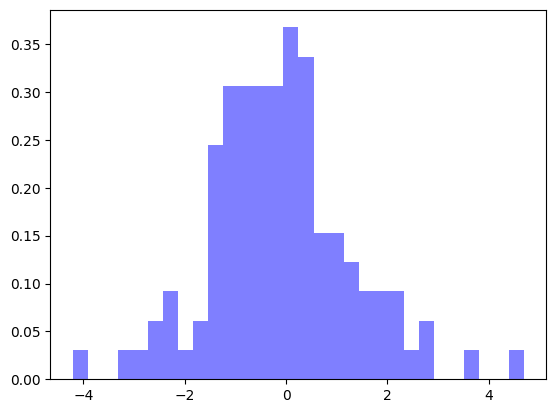

In [34]:
# Генерируем выборку
random_sample = np.random.standard_t(df=k, size=n)
plt.hist(random_sample, bins=30, density=True, alpha=0.5, color='b', label='Выборка')

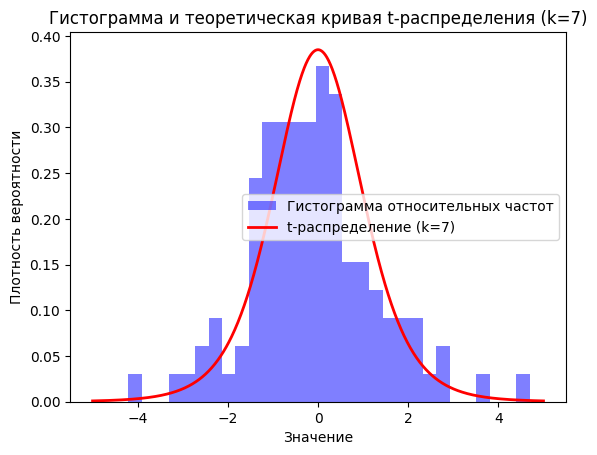

In [35]:
    plt.hist(random_sample, bins=30, density=True, alpha=0.5, color='b', label='Гистограмма относительных частот')
    # Строим теоретическую кривую распределения
    x = np.linspace(-5, 5, 1000)
    t_pdf = t.pdf(x, df=k)
    plt.plot(x, t_pdf, 'r', lw=2, label=f't-распределение (k={k})')
    
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.title(f'Гистограмма и теоретическая кривая t-распределения (k={k})')
    plt.show()

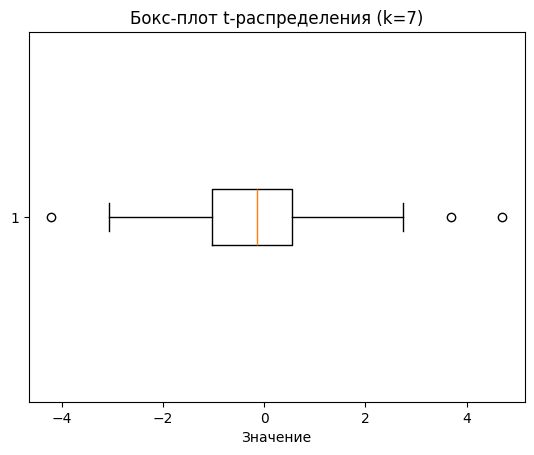

In [36]:
plt.boxplot(random_sample, vert=False)
plt.xlabel('Значение')
plt.title(f'Бокс-плот t-распределения (k={k})')
plt.show()

In [37]:
q = 1.25
sigma = 3
std_deviation = sigma

# Вычисляем вероятность P(|Y - MY| < q * σ)
left_bound = -q * std_deviation
right_bound = q * std_deviation

# Используем функцию распределения t-распределения
probability = stats.t.cdf(right_bound, df=k) - stats.t.cdf(left_bound, df=k)

print(f'Вероятность P(|Y - MY| < {q} * {sigma}) = {probability:.4f}')

Вероятность P(|Y - MY| < 1.25 * 3) = 0.9928


In [38]:
# Математическое ожидание (среднее значение)
mean = np.mean(random_sample)

# Медиана
median = np.median(random_sample)

# Дисперсия
variance = np.var(random_sample)

# Стандартное отклонение
std_deviation = np.std(random_sample)

# Коэффициент ассиметрии
skewness = skew(random_sample)

# Эксцесс
kurt = kurtosis(random_sample)

print(f'Математическое ожидание (среднее значение): {mean:.4f}')
print(f'Медиана: {median:.4f}')
print(f'Дисперсия: {variance:.4f}')
print(f'Стандартное отклонение: {std_deviation:.4f}')
print(f'Коэффициент ассиметрии: {skewness:.4f}')
print(f'Эксцесс: {kurt:.4f}')

Математическое ожидание (среднее значение): -0.1084
Медиана: -0.1491
Дисперсия: 1.9011
Стандартное отклонение: 1.3788
Коэффициент ассиметрии: 0.3452
Эксцесс: 1.2275


In [39]:
q = 1.25
sigma = 3

# Вычисляем среднее значение (MY)
mean = np.mean(random_sample)

# Вычисляем стандартное отклонение (σ)
std_deviation = sigma

# Определяем границы интервала
left_bound = mean - q * std_deviation
right_bound = mean + q * std_deviation

# Считаем, сколько наблюдений удовлетворяют условию
count_within_interval = np.sum((random_sample >= left_bound) & (random_sample <= right_bound))

# Вычисляем оценку вероятности
probability_estimate = count_within_interval / len(random_sample)

print(f'Оценка вероятности P(|Y - MY| < {q} * {sigma}) = {probability_estimate:.4f}')


Оценка вероятности P(|Y - MY| < 1.25 * 3) = 0.9727
